# Predictive Visualization with mlxtend

## Decision regions in 2D

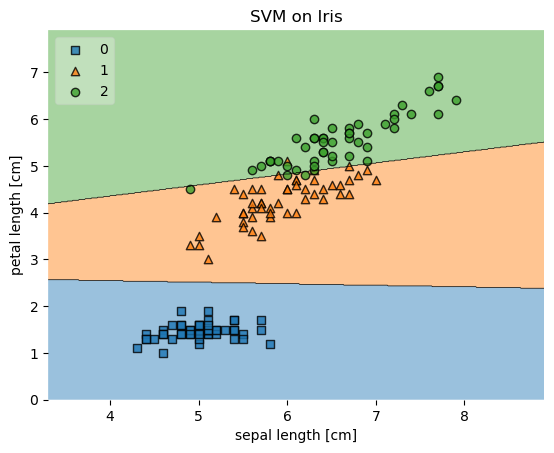

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Decision Region Grids

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

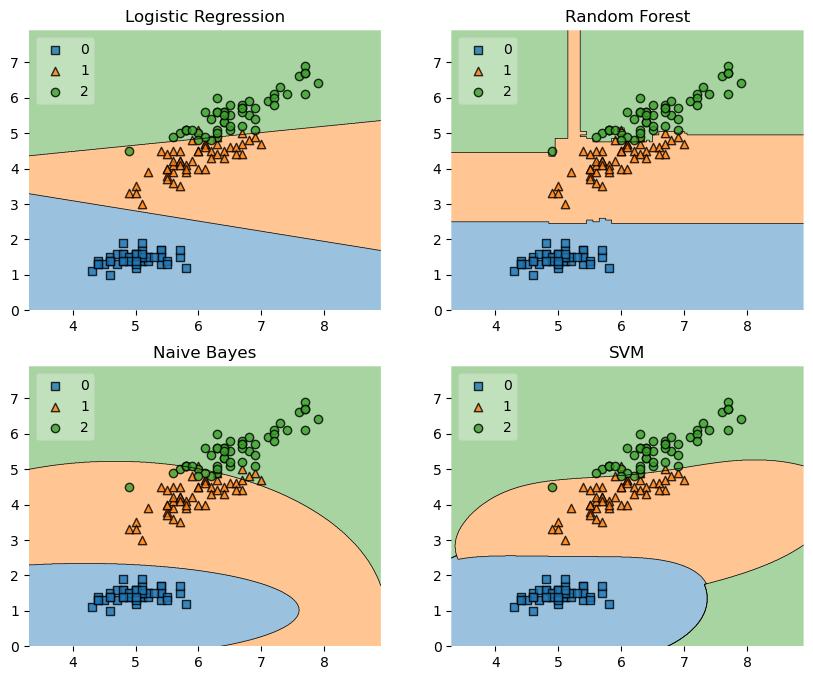

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Evaluating Classifier Behavior on Non-Linear Problems

### XOR

In [4]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

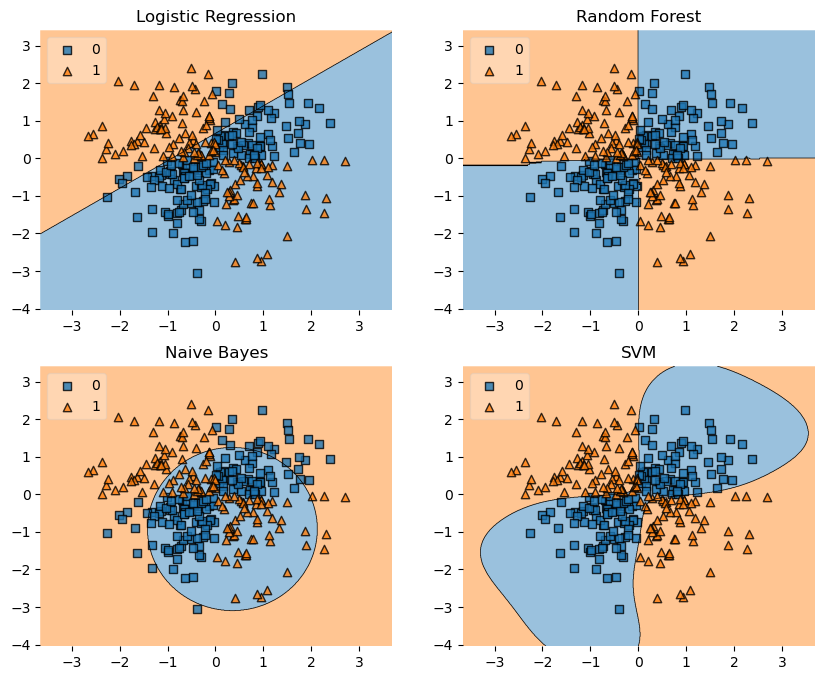

In [5]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Half-Moons

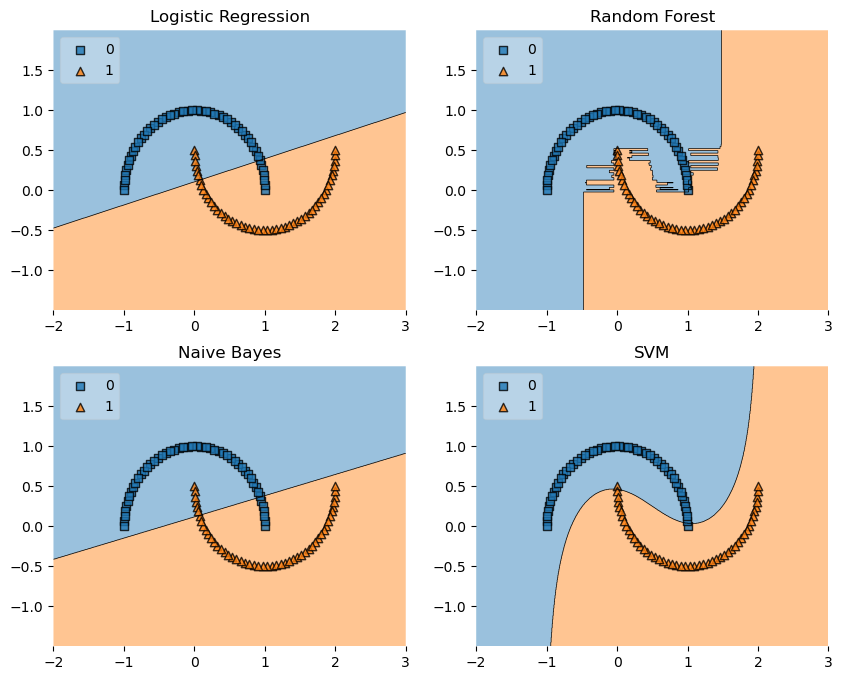

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Concentric Circles

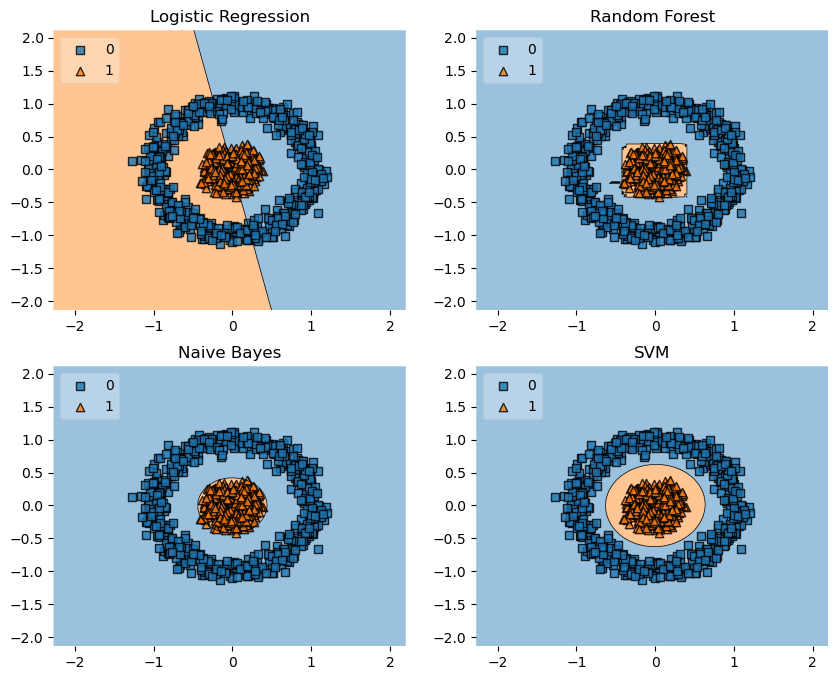

In [7]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Decision regions with more than two training features

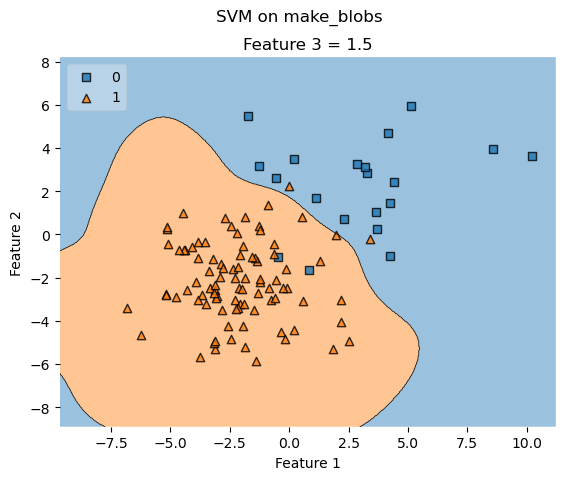

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
X, y = datasets.make_blobs(n_samples=600, n_features=3,
                           centers=[[2, 2, -2],[-2, -2, 2]],
                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC(gamma='auto')
svm.fit(X, y)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

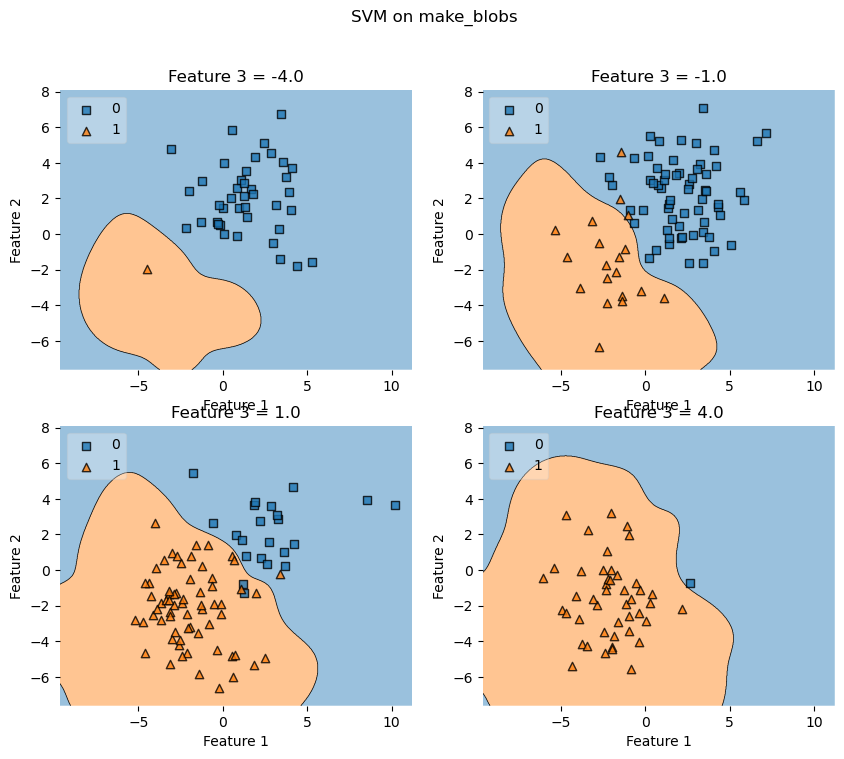

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
X, y = datasets.make_blobs(n_samples=500, n_features=3, centers=[[2, 2, -2],[-2, -2, 2]],
                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC(gamma='auto')
svm.fit(X, y)

# Plotting decision regions
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
values = [-4.0, -1.0, 1.0, 4.0]
width = 0.75
for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X, y, clf=svm,
                          filler_feature_values={2: value},
                          filler_feature_ranges={2: width},
                          legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

## Providing your own legend labels

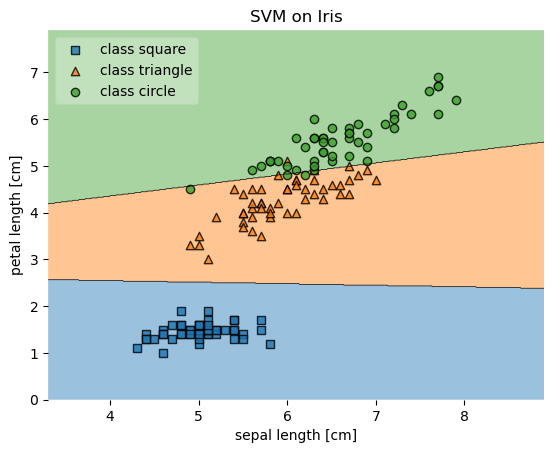

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
ax = plot_decision_regions(X, y, clf=svm, legend=0)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['class square', 'class triangle', 'class circle'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

## Zooming in

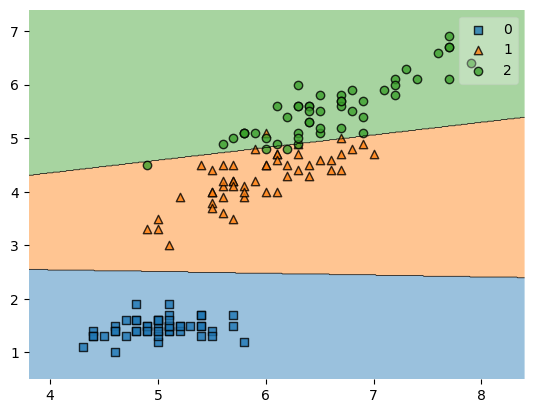

In [11]:
plot_decision_regions(X, y, clf=svm, zoom_factor=2.0)
plt.show()